In [15]:
import pandas as pd

df = pd.read_csv('/content/product_return.csv')
print(df.head())
print(df.info())


   purchase_amount  review_score  days_to_delivery returned
0       687.011818      3.778615                 4       no
1       325.972093      2.458683                 1      yes
2       685.382724      3.954024                 7       no
3       291.100577      3.666468                14      yes
4       209.806672      1.478248                 2       no
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   purchase_amount   100 non-null    float64
 1   review_score      100 non-null    float64
 2   days_to_delivery  100 non-null    int64  
 3   returned          100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB
None


In [16]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()  # Clean names

print("Column names in your dataset:")
print(df.columns.tolist())


Column names in your dataset:
['purchase_amount', 'review_score', 'days_to_delivery', 'returned']


Accuracy : 0.40
Precision: 0.47
Recall   : 0.64


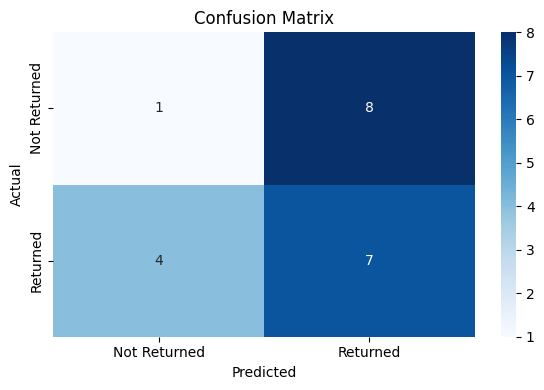

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


df = pd.read_csv("/content/product_return.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

target_col = 'returned'

if df[target_col].dtype == object or df[target_col].dtype.name == "category":
    df[target_col] = LabelEncoder().fit_transform(df[target_col])

X = df.drop(columns=[target_col])
y = df[target_col]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall   : {recall_score(y_test, y_pred):.2f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Returned", "Returned"],
            yticklabels=["Not Returned", "Returned"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
